In [11]:
import numpy as np
import matplotlib.pyplot as plt

racines_unite_rot = lambda n,theta : np.array([[np.cos(2*k*np.pi/n + theta), np.sin(2*k*np.pi/n + theta)] for k in range(n)])

#Paramètres

d = 2
n = 10
r = n

#Coordonnées 2 courbes

C1 = racines_unite_rot(n,0)
C2 = racines_unite_rot(n,np.pi/n)
Z = C1

In [12]:
noyau_gauss = lambda sigma,x,y : np.exp(-np.linalg.norm(x-y)**2/(2*sigma**2))

def champ_vect_appl(sigma,fam_gen,x):
    v = np.zeros(d)
    for i in range(r):
        v += noyau_gauss(sigma,Z[i],x)*fam_gen[i]
    return v
              
def champ_vect(fam_gen,sigma):
    return lambda x : champ_vect_appl(fam_gen,sigma,x)

def deform(v):
    return lambda x : x + v(x)

deform_appl = lambda fam_gen,sigma,x : deform(champ_vect(fam_gen,sigma))(x)

In [6]:
#Ensemble des familles de vecteurs génératrices de V

random_vect = lambda d : np.array([np.random.uniform(-1,1) for _ in range(d)])

ens_fam_gen = [[random_vect(d) for _ in range(r)] for _ in range(50)]

In [7]:
#Ensemble des champs de vecteurs V et déformations D

ens_champs_vect = lambda sigma : [champ_vect(fam_gen,sigma) for fam_gen in ens_fam_gen]

ens_deform = lambda sigma : [deform(v) for v in ens_champs_vect(sigma)]

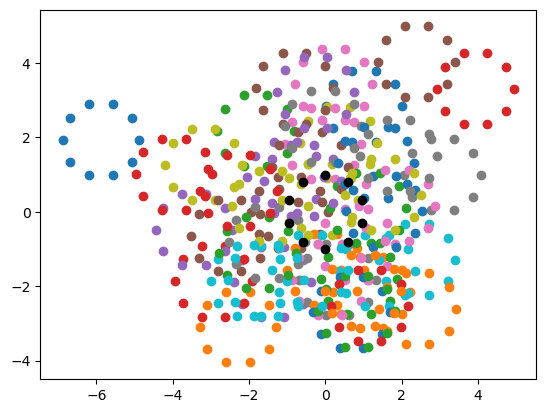

In [8]:
sigma = 20

plt.figure()

for phi in ens_deform(sigma):
    C1_deforme = phi(C1)
    plt.scatter(C1_deforme[:,0],C1_deforme[:,1])
    
plt.scatter(C2[:,0],C2[:,1], color='black')

plt.show()

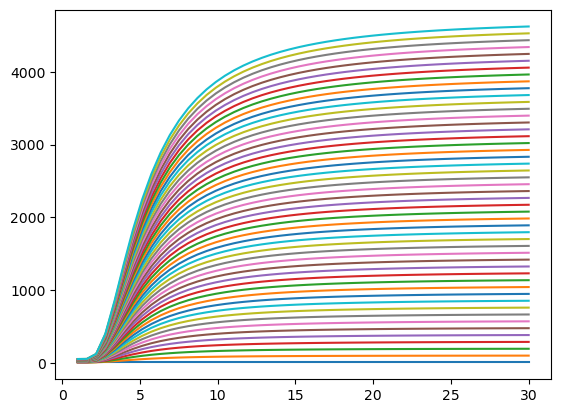

In [9]:
dist = lambda C1,C2 : np.sum([np.linalg.norm(C1[i]-C2[i])**2 for i in range(n)])

cout = lambda fam_gen : 1/2*np.sum([np.linalg.norm(fam_gen[i])**2 for i in range(r)])

energie = lambda fam_gen,sigma,lambd : cout(fam_gen) + lambd*dist(deform_appl(fam_gen,sigma,C1),C2)

fam_gen = ens_fam_gen[0]
lambd = 2

sigma_val = np.linspace(1,30)
#energie_val = np.array([energie(fam_gen,sigma,lambd) for sigma in sigma_val])

plt.figure()

for lambd in range(50):
    energie_val = np.array([energie(fam_gen,sigma,lambd) for sigma in sigma_val])
    plt.plot(sigma_val, energie_val)

plt.show()

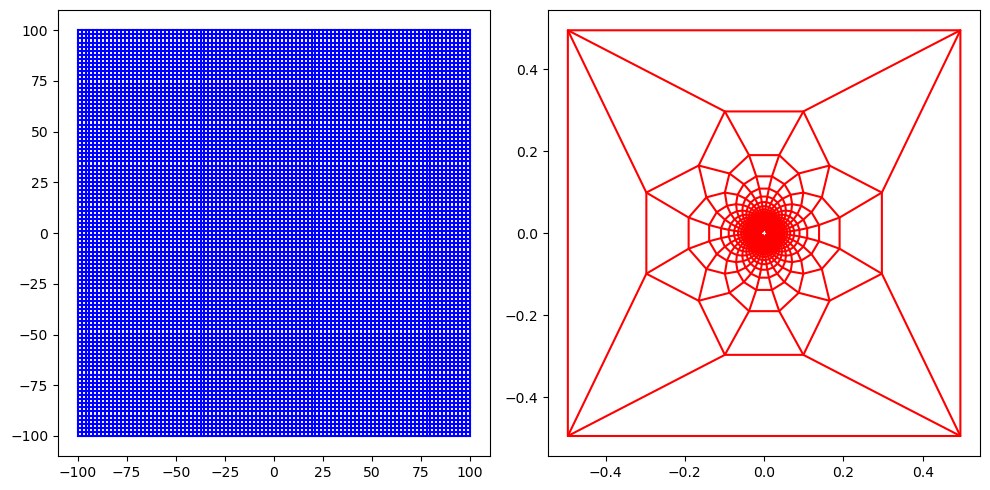

In [10]:
#Define the function that maps points from the input plane to the output plane
def modify_function(x, y):
    # Example transformation: Scaling and rotating
    n = x**2 + y**2
    new_x = x/n
    new_y = -y/n
    return new_x, new_y

# Generate a grid of points in the input plane
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)

# Apply the function to each point in the grid
new_X, new_Y = modify_function(X, Y)

# Plot the original grid
plt.figure(figsize=(10, 5))

# Plot original grid lines
for i in range(len(x)):
    plt.subplot(1, 2, 1)
    plt.plot(X[i], Y[i], color='blue')  # Plot original horizontal gridlines
    plt.plot(X[:, i], Y[:, i], color='blue')  # Plot original vertical gridlines

# Plot modified horizontal grid lines
for i in range(len(x)):
    plt.subplot(1, 2, 2)
    plt.plot(new_X[i], new_Y[i], color='red')  # Plot modified horizontal gridlines
    plt.plot(new_X[:, i], new_Y[:, i], color='red')  # Plot modified vertical gridlines

plt.tight_layout()
plt.show()